**Install Dependencies**

This block installs Biopython, a required library for working with PDB structures in Python. This cell also defines the list of AlphaFold-generated PDB models for ADGRE2 stored in Google Drive. Make sure your Drive is mounted before running this. This code parses each PDB file, aligns structures to the first model using backbone atoms, and computes RMSD (Root Mean Square Deviation) values. The result is output as a pairwise RMSD matrix using pandas.

In [ ]:
# Install Biopython if needed
!pip install biopython

from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd

# Extended model file list
model_files = [
    "/content/drive/MyDrive/ADGRE2_AF_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_4.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_0.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_1.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_2.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_3.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_4.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_4.pdb"
]

# Reference structures
uniprot_af_file = "/content/drive/MyDrive/AF-Q9UHX3-F1-model_v4.pdb"
xray_file = "/content/drive/MyDrive/ADGRE2_X_Ray_structure.pdb"

# RMSD calculator
def calculate_rmsd(ref_path, test_path):
    parser = PDBParser(QUIET=True)
    ref_structure = parser.get_structure("ref", ref_path)
    test_structure = parser.get_structure("test", test_path)

    ref_atoms = [a for a in ref_structure.get_atoms() if a.get_id() == "CA"]
    test_atoms = [a for a in test_structure.get_atoms() if a.get_id() == "CA"]

    n = min(len(ref_atoms), len(test_atoms))
    if n == 0:
        return None

    sup = Superimposer()
    sup.set_atoms(ref_atoms[:n], test_atoms[:n])
    return sup.rms

# Run comparisons
results = []
for model_file in model_files:
    rmsd_af = calculate_rmsd(uniprot_af_file, model_file)
    rmsd_xray = calculate_rmsd(xray_file, model_file)
    results.append({
        "model": os.path.basename(model_file),
        "RMSD_to_AF": rmsd_af,
        "RMSD_to_Xray": rmsd_xray
    })

# Display results
df = pd.DataFrame(results)
df = df.sort_values(by="RMSD_to_Xray")
df.reset_index(drop=True, inplace=True)
df

,model,RMSD_to_AF,RMSD_to_Xray
0,AGRE2_C492Y_Model_3.pdb,23.846065,39.570363
1,AGRE2_C492Y_Model_0.pdb,22.367886,40.604033
2,ADGRE2_AF_model_0.pdb,21.569211,40.735529
3,ADGRE2_Ca_model_4.pdb,22.162054,40.885412
4,ADGRE2_Ca_model_0.pdb,28.342363,41.043573
5,ADGRE2_Ca_model_3.pdb,23.966695,41.143917
6,AGRE2_C492Y_Model_4.pdb,23.510523,41.395973
7,ADGRE2_AF_model_3.pdb,23.344093,41.508830
8,ADGRE2_AF_model_4.pdb,23.262645,41.546067
9,ADGRE2_Ca_model_2.pdb,27.320964,42.016461


In [ ]:
print(df)

                      model  RMSD_to_AF  RMSD_to_Xray
0   AGRE2_C492Y_Model_3.pdb   23.846065     39.570363
1   AGRE2_C492Y_Model_0.pdb   22.367886     40.604033
2     ADGRE2_AF_model_0.pdb   21.569211     40.735529
3     ADGRE2_Ca_model_4.pdb   22.162054     40.885412
4     ADGRE2_Ca_model_0.pdb   28.342363     41.043573
5     ADGRE2_Ca_model_3.pdb   23.966695     41.143917
6   AGRE2_C492Y_Model_4.pdb   23.510523     41.395973
7     ADGRE2_AF_model_3.pdb   23.344093     41.508830
8     ADGRE2_AF_model_4.pdb   23.262645     41.546067
9     ADGRE2_Ca_model_2.pdb   27.320964     42.016461
10    ADGRE2_Ca_model_1.pdb   24.252275     42.022325
11  AGRE2_C492Y_Model_2.pdb   28.217573     42.116407
12    ADGRE2_AF_model_1.pdb   30.297647     42.512076
13  AGRE2_C492Y_Model_1.pdb   17.063147     42.600468
14    ADGRE2_AF_model_2.pdb   22.503868     43.241695


This block visualizes the RMSD values as a graph rather than a table.

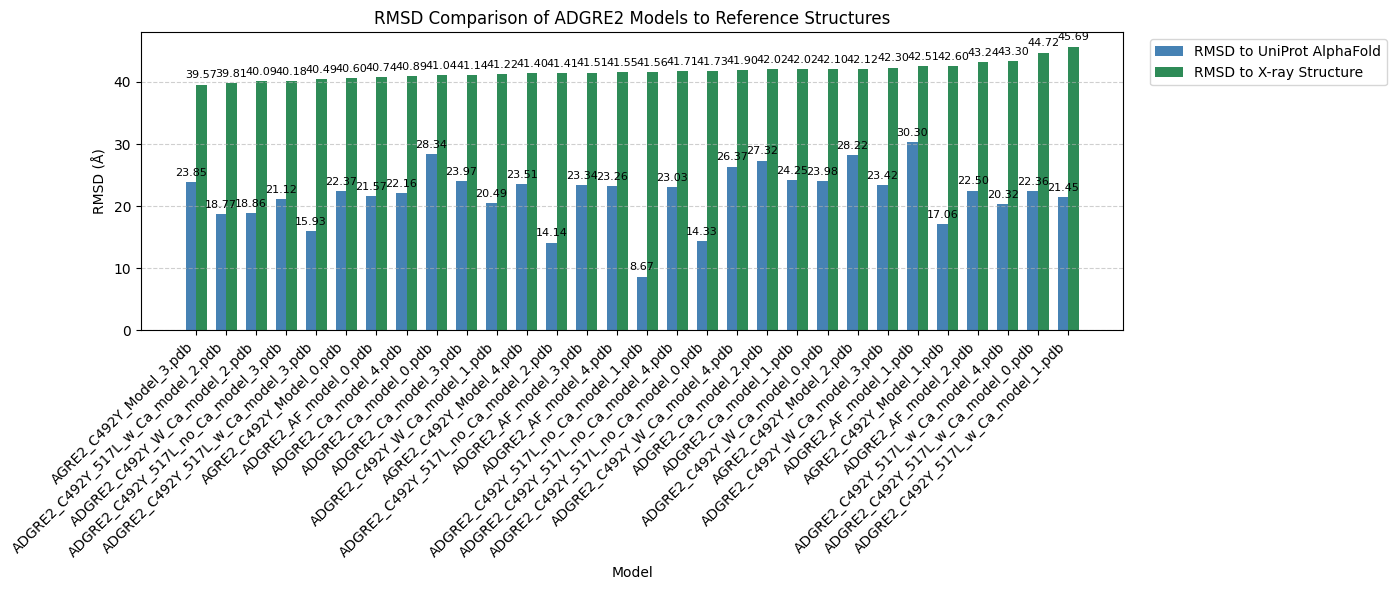

In [ ]:
# Reinstall Biopython after runtime reset
!pip install biopython

# Re-import libraries after environment reset
import os
from Bio.PDB import PDBParser, Superimposer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Re-define model files including the new ones
model_files = [
    "/content/drive/MyDrive/ADGRE2_AF_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_AF_model_4.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_0.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_1.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_2.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_3.pdb",
    "/content/drive/MyDrive/AGRE2_C492Y_Model_4.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_Ca_model_4.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_W_Ca_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_W_Ca_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_W_Ca_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_W_Ca_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_W_Ca_model_4.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_no_Ca_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_no_Ca_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_no_Ca_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_no_Ca_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_no_Ca_model_4.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_w_Ca_model_0.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_w_Ca_model_1.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_w_Ca_model_2.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_w_Ca_model_3.pdb",
    "/content/drive/MyDrive/ADGRE2_C492Y_517L_w_Ca_model_4.pdb"
]

# Reference structures
uniprot_af_file = "/content/drive/MyDrive/AF-Q9UHX3-F1-model_v4.pdb"
xray_file = "/content/drive/MyDrive/ADGRE2_X_Ray_structure.pdb"

# RMSD calculator
def calculate_rmsd(ref_path, test_path):
    parser = PDBParser(QUIET=True)
    ref_structure = parser.get_structure("ref", ref_path)
    test_structure = parser.get_structure("test", test_path)

    ref_atoms = [a for a in ref_structure.get_atoms() if a.get_id() == "CA"]
    test_atoms = [a for a in test_structure.get_atoms() if a.get_id() == "CA"]

    n = min(len(ref_atoms), len(test_atoms))
    if n == 0:
        return None

    sup = Superimposer()
    sup.set_atoms(ref_atoms[:n], test_atoms[:n])
    return sup.rms

# Run comparisons
results = []
for model_file in model_files:
    if not os.path.exists(model_file):
        results.append({
            "model": os.path.basename(model_file),
            "RMSD_to_AF": None,
            "RMSD_to_Xray": None
        })
        continue

    rmsd_af = calculate_rmsd(uniprot_af_file, model_file)
    rmsd_xray = calculate_rmsd(xray_file, model_file)
    results.append({
        "model": os.path.basename(model_file),
        "RMSD_to_AF": rmsd_af,
        "RMSD_to_Xray": rmsd_xray
    })

# Display results in a DataFrame
df = pd.DataFrame(results)
df = df.sort_values(by="RMSD_to_Xray")
df.reset_index(drop=True, inplace=True)

# Set up the plot
labels = df["model"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, df["RMSD_to_AF"], width, label="RMSD to UniProt AlphaFold", color="steelblue")
bars2 = ax.bar(x + width/2, df["RMSD_to_Xray"], width, label="RMSD to X-ray Structure", color="seagreen")

ax.set_xlabel("Model")
ax.set_ylabel("RMSD (Å)")
ax.set_title("RMSD Comparison of ADGRE2 Models to Reference Structures")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        if pd.notnull(height):
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.show()